Первые 5 строк набора данных:
   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Проверка на пропущенные значения:
sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Размер тренировочного набора: (120, 4)
Размер тестового набора: (30, 4)
K=1, Точность=0.9667
K=2, Точность=0.9333
K=3, Точность=0.9333
K=4, Точность=0.9333
K=5, Точность=0.9333
K=6, Точность=0.9333
K=7, Точность=0.9667
K=8, Точность=0.9333
K=9, Точность=0.9667
K=10, Точность=0.9667
K=11, Точность=0.9667
K=12, Точность=0.9667
K=13, Точность=0.9667
K=14, Точность=0.9667
K=15, Точность=0.9667
K=16, Точность=0.9667
K=17, Точность=0.9667
K=18, Точн

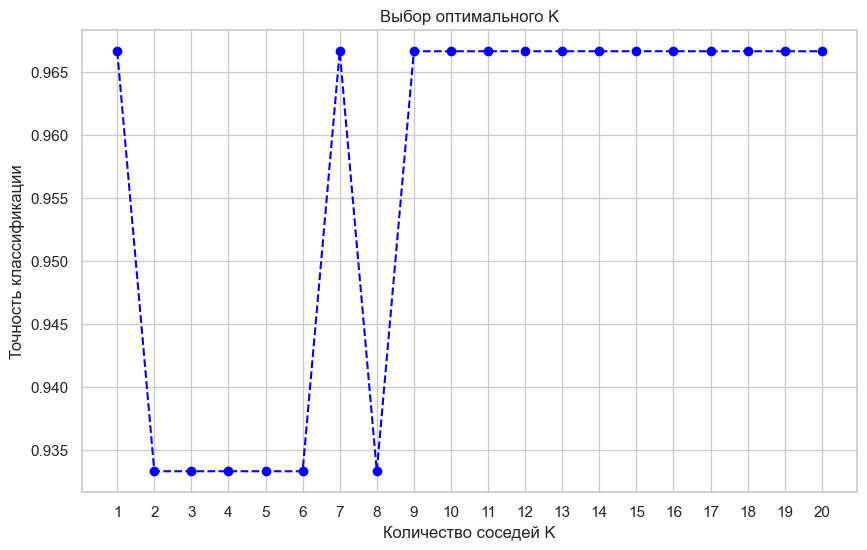


Оптимальное количество соседей: K=1

Модель KNN обучена на тренировочных данных.

Первые 5 строк результатов предсказаний:
     sepal.length  sepal.width  petal.length  petal.width      Actual  \
38            4.4          3.0           1.3          0.2      Setosa   
127           6.1          3.0           4.9          1.8   Virginica   
57            4.9          2.4           3.3          1.0  Versicolor   
93            5.0          2.3           3.3          1.0  Versicolor   
42            4.4          3.2           1.3          0.2      Setosa   

      Predicted  
38       Setosa  
127   Virginica  
57   Versicolor  
93   Versicolor  
42       Setosa  


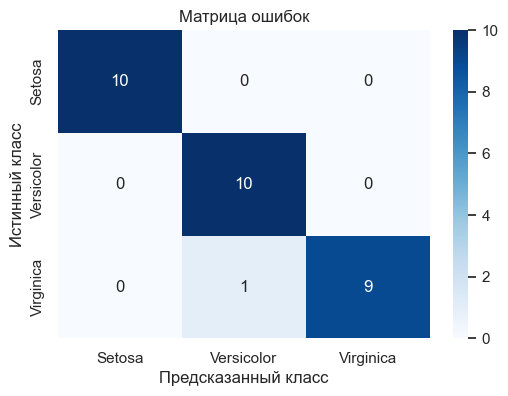


Точность модели KNN: 0.9667

Отчет классификации:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.91      1.00      0.95        10
   Virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



c:\Users\shark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


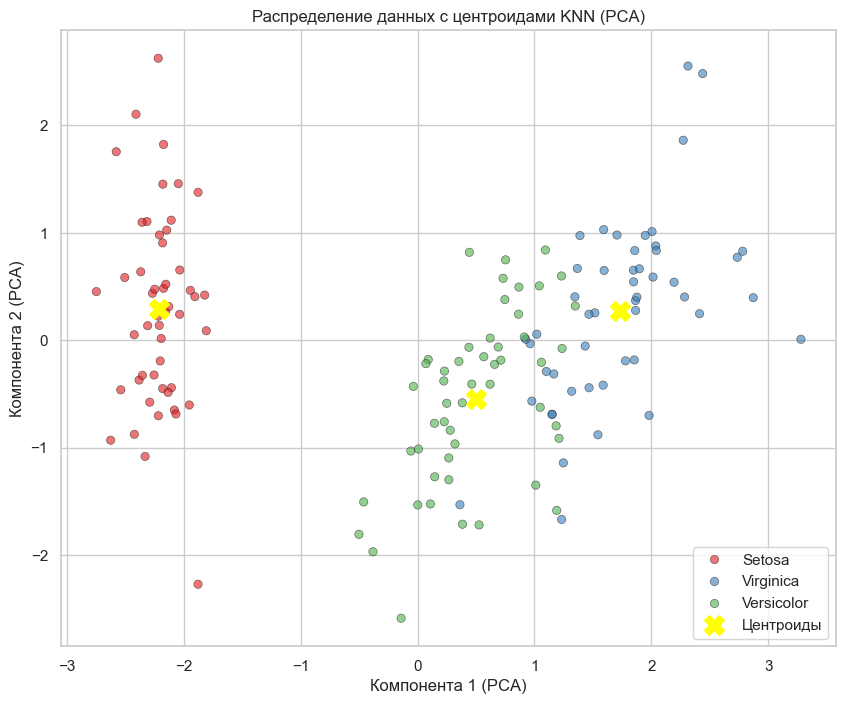

c:\Users\shark\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


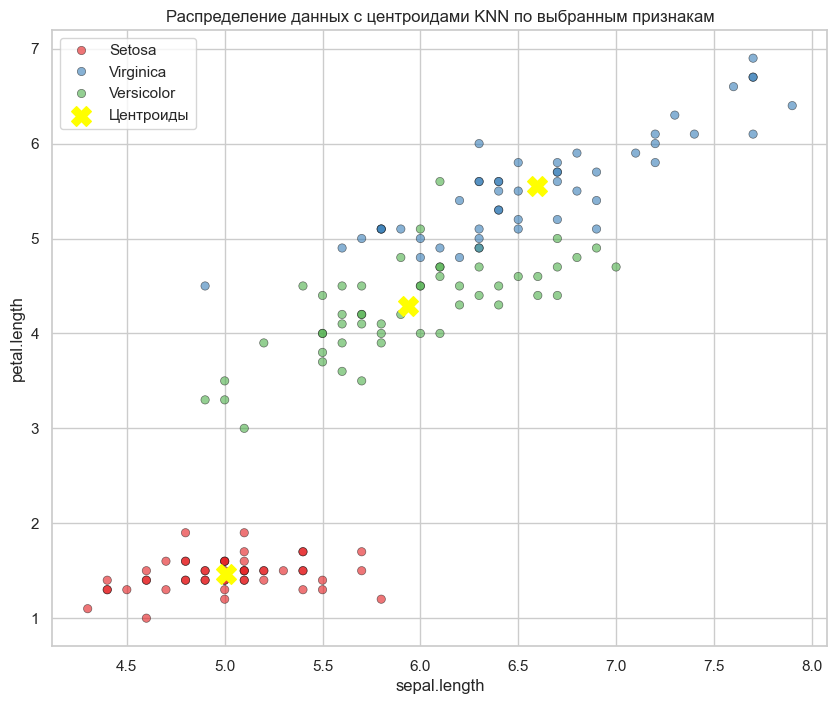

In [5]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Установка стиля графиков
sns.set(style="whitegrid")

# Этап 0. Предобработка данных

# Шаг 1. Загрузка данных из CSV файла
# Убедитесь, что файл 'iris.csv' находится в той же директории, откуда запускается скрипт, или укажите полный путь к файлу.
data = pd.read_csv('iris.csv')

print("Первые 5 строк набора данных:")
print(data.head())

# Проверка наличия пропущенных значений
print("\nПроверка на пропущенные значения:")
print(data.isnull().sum())

# Шаг 2. Разделение данных на признаки и целевую переменную
X = data.drop('variety', axis=1)
y = data['variety']

# Шаг 3. Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'\nРазмер тренировочного набора: {X_train.shape}')
print(f'Размер тестового набора: {X_test.shape}')

# Этап 1. Нормализация данных

# Инициализация скалера
scaler = StandardScaler()

# Обучение скалера на тренировочных данных и трансформация
X_train_scaled = scaler.fit_transform(X_train)

# Трансформация тестовых данных
X_test_scaled = scaler.transform(X_test)

# Преобразование обратно в DataFrame для удобства
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Этап 2. Реализация алгоритма K-ближайших соседей (KNN)

# Функция для подбора оптимального K
def find_optimal_k(X_train, y_train, X_test, y_test, max_k=20):
    accuracy_scores = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracy_scores.append(acc)
        print(f"K={k}, Точность={acc:.4f}")
    
    # Визуализация зависимости точности от K
    plt.figure(figsize=(10,6))
    plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='blue')
    plt.xlabel('Количество соседей K')
    plt.ylabel('Точность классификации')
    plt.title('Выбор оптимального K')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()
    
    # Выбор K с наибольшей точностью
    optimal_k = k_values[np.argmax(accuracy_scores)]
    print(f'\nОптимальное количество соседей: K={optimal_k}')
    
    return optimal_k

# Подбор оптимального K
optimal_k = find_optimal_k(X_train_scaled, y_train, X_test_scaled, y_test, max_k=20)

# Обучение модели KNN с оптимальным K
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn.fit(X_train_scaled, y_train)
print("\nМодель KNN обучена на тренировочных данных.")

# Предсказание классов для тестового набора
y_pred = knn.predict(X_test_scaled)

# Добавление предсказаний в DataFrame тестовой выборки
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_pred

# Просмотр первых нескольких строк результатов
print("\nПервые 5 строк результатов предсказаний:")
print(test_results.head())

# Этап 3. Оценка качества модели

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn.classes_, 
            yticklabels=knn.classes_)
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.title('Матрица ошибок')
plt.show()

# Вычисление точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'\nТочность модели KNN: {accuracy:.4f}')

# Подробный отчет классификации
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred, target_names=knn.classes_))

# Визуализация распределения данных и центроидов

def visualize_clusters(knn, scaler, X_train, X_test, y_train, y_test, feature_names):
    # Объединение обучающей и тестовой выборок для визуализации
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    
    # Предсказание классов для всей выборки
    y_pred_combined = knn.predict(X_combined)
    
    # Вычисление центроидов
    centroids = []
    for cls in np.unique(y_pred_combined):
        class_points = X_combined[y_pred_combined == cls]
        centroid = class_points.mean(axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    
    # Снижение размерности с помощью PCA для визуализации
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_combined)
    centroids_pca = pca.transform(centroids)
    
    # Визуализация
    plt.figure(figsize=(10,8))
    palette = sns.color_palette("Set1", n_colors=len(np.unique(y_pred_combined)))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_pred_combined, palette=palette, alpha=0.6, edgecolor='k')
    plt.scatter(centroids_pca[:,0], centroids_pca[:,1], s=200, c='yellow', marker='X', label='Центроиды')
    plt.xlabel('Компонента 1 (PCA)')
    plt.ylabel('Компонента 2 (PCA)')
    plt.title('Распределение данных с центроидами KNN (PCA)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Вызов функции визуализации кластеров
visualize_clusters(knn, scaler, X_train_scaled, X_test_scaled, y_train, y_test, X.columns)

# Дополнительная визуализация с выбором двух признаков

def visualize_clusters_with_features(knn, scaler, X_train, X_test, y_train, y_test, feature_names):
    # Объединение обучающей и тестовой выборок для визуализации
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    
    # Предсказание классов для всей выборки
    y_pred = knn.predict(X_combined)
    
    # Выбор двух признаков для визуализации
    feature1 = 'sepal.length'  # Замените на желаемый признак
    feature2 = 'petal.length'  # Замените на желаемый признак
    
    # Получение индексов выбранных признаков
    idx1 = list(feature_names).index(feature1)
    idx2 = list(feature_names).index(feature2)
    
    # Извлечение выбранных признаков
    x_axis = X_combined[:, idx1]
    y_axis = X_combined[:, idx2]
    
    # Вычисление центроидов
    centroids = []
    for cls in np.unique(y_pred):
        class_points = X_combined[y_pred == cls]
        centroid = class_points.mean(axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)
    
    # Извлечение выбранных признаков для центроидов
    centroid_feature1 = centroids[:, idx1]
    centroid_feature2 = centroids[:, idx2]
    
    # Инвертирование масштабирования для визуализации в исходном пространстве
    X_combined_original = scaler.inverse_transform(X_combined)
    x_axis_original = X_combined_original[:, idx1]
    y_axis_original = X_combined_original[:, idx2]
    centroids_original = scaler.inverse_transform(centroids)
    centroid_feature1_original = centroids_original[:, idx1]
    centroid_feature2_original = centroids_original[:, idx2]
    
    # Визуализация
    plt.figure(figsize=(10,8))
    palette = sns.color_palette("Set1", n_colors=len(np.unique(y_pred)))
    sns.scatterplot(x=x_axis_original, y=y_axis_original, hue=y_pred, palette=palette, alpha=0.6, edgecolor='k')
    plt.scatter(centroid_feature1_original, centroid_feature2_original, s=200, c='yellow', marker='X', label='Центроиды')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title('Распределение данных с центроидами KNN по выбранным признакам')
    plt.legend()
    plt.grid(True)
    plt.show()

# Вызов дополнительной функции визуализации
visualize_clusters_with_features(knn, scaler, X_train_scaled, X_test_scaled, y_train, y_test, X.columns)
